# Solution Notebook

In [1]:
import numpy as np                             
import pandas as pd                             
import matplotlib.pyplot as plt                             
import seaborn as sns
import os
import scipy.stats as stats
import statsmodels.api as sm
import pylab as py
from sklearn.preprocessing import PowerTransformer, OneHotEncoder


In [2]:
# marketing = pd.read_excel('data/marketing_campaign.xslx',header=0)
marketing = pd.read_excel('data/marketing_campaign.xlsx')
marketing.drop(columns='ID',inplace=True)

# Data Exploration

In [3]:
marketing.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [4]:
marketing['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [5]:
marketing['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

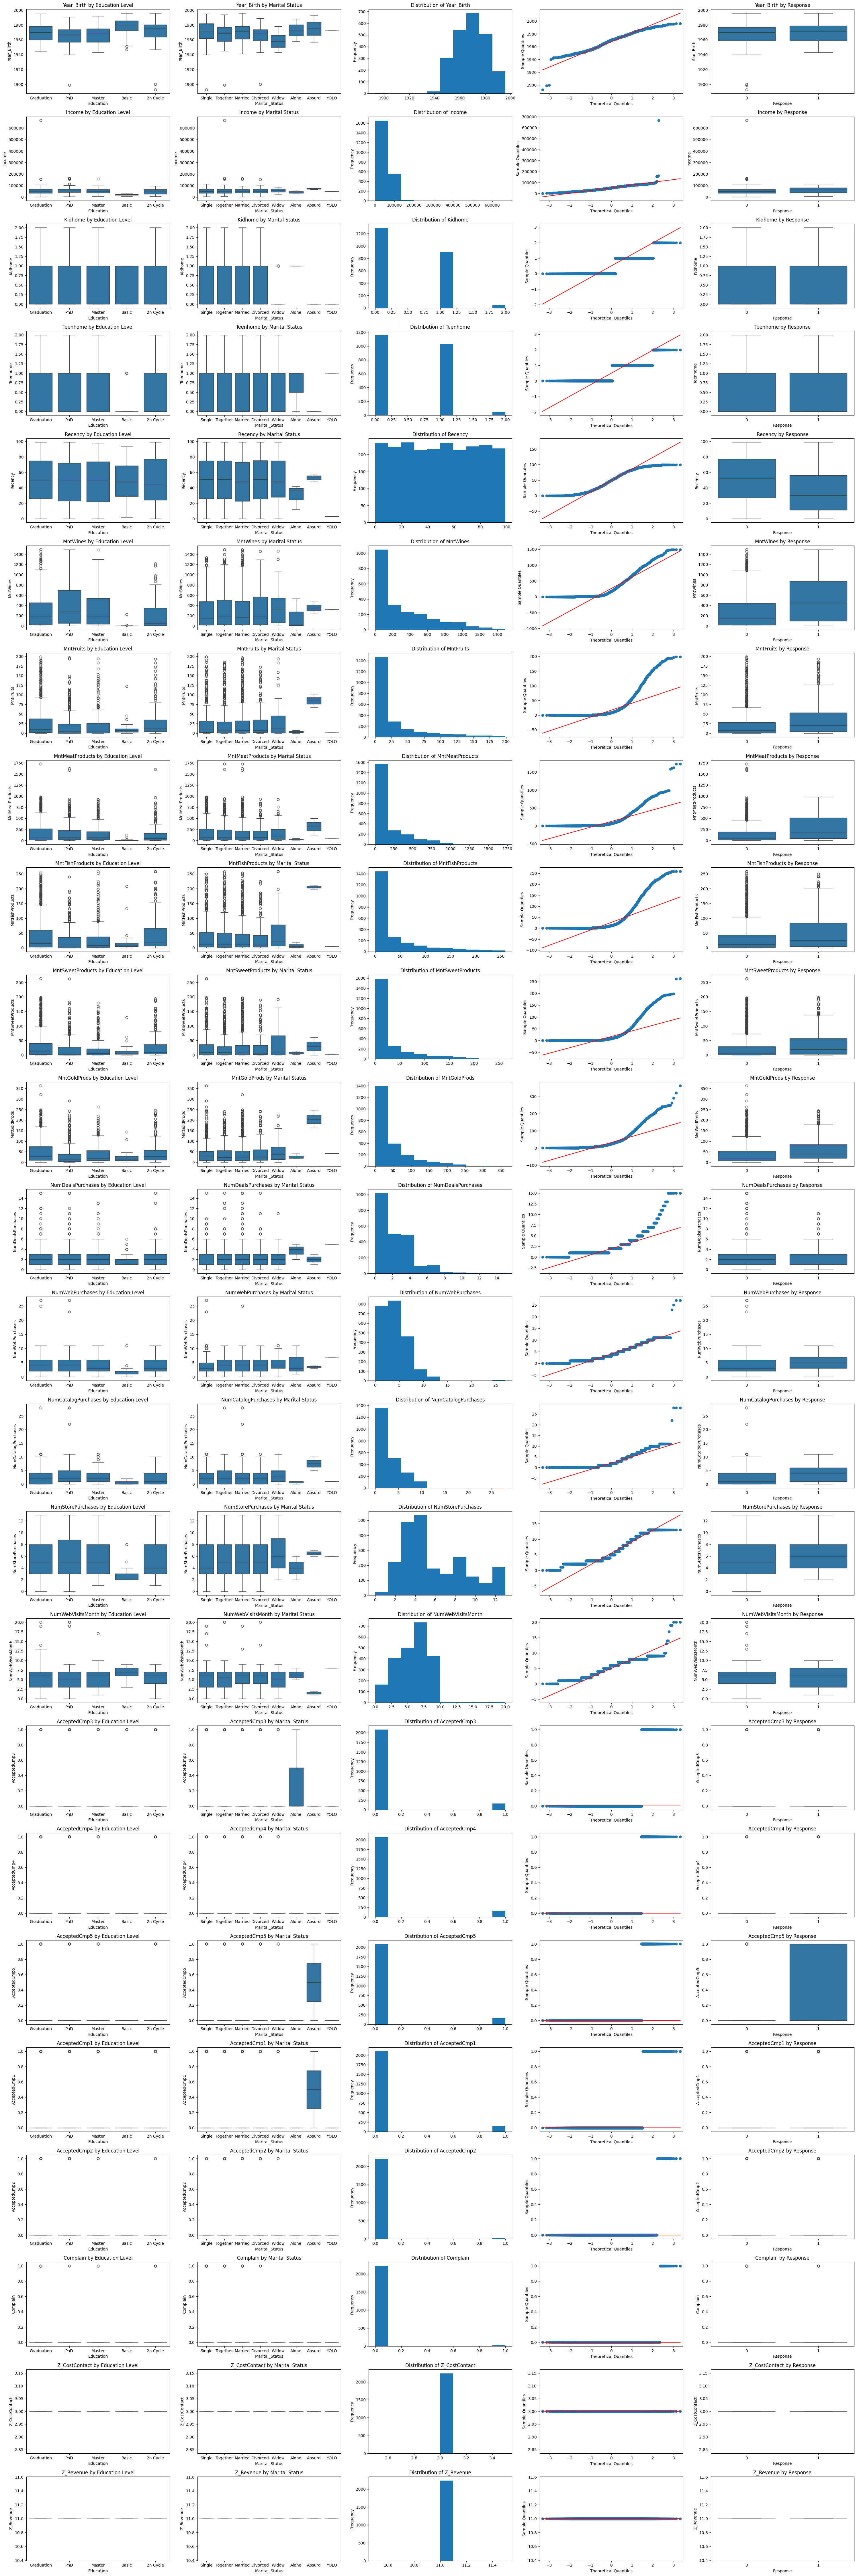

In [6]:
def diagnostic_plots(df, target):
    num_df = df.select_dtypes(include='number')
    fig, axs = plt.subplots(ncols=5, nrows=len(num_df.columns)-1,figsize=(30,90))
    row = 0
    for col in num_df:
        if col == target:
            continue
        # Boxplot by Education
        sns.boxplot(num_df, x=df['Education'], y=num_df[col], ax=axs[row,0])
        axs[row,0].set_title(f'{col} by Education Level')

        # Boxplot by Marital Status
        sns.boxplot(num_df, x=df['Marital_Status'], y=num_df[col], ax=axs[row, 1])
        axs[row,1].set_title(f'{col} by Marital Status')

        # Distribution of data
        num_df[col].plot(kind='hist',ax=axs[row,2])
        axs[row,2].set_title(f'Distribution of {col}')
        
        # Checking normality in a different way
        #stats.probplot(num_df[col],dist='norm',plot=axs[row,3])
        sm.qqplot(num_df[col], line='q',ax=axs[row, 3])

        # Boxplot var against response
        sns.boxplot(num_df, x=df[target], y=num_df[col], ax=axs[row,4])
        axs[row,4].set_title(f'{col} by Response')
        row += 1
    plt.tight_layout()
    plt.show()

diagnostic_plots(marketing, 'Response')

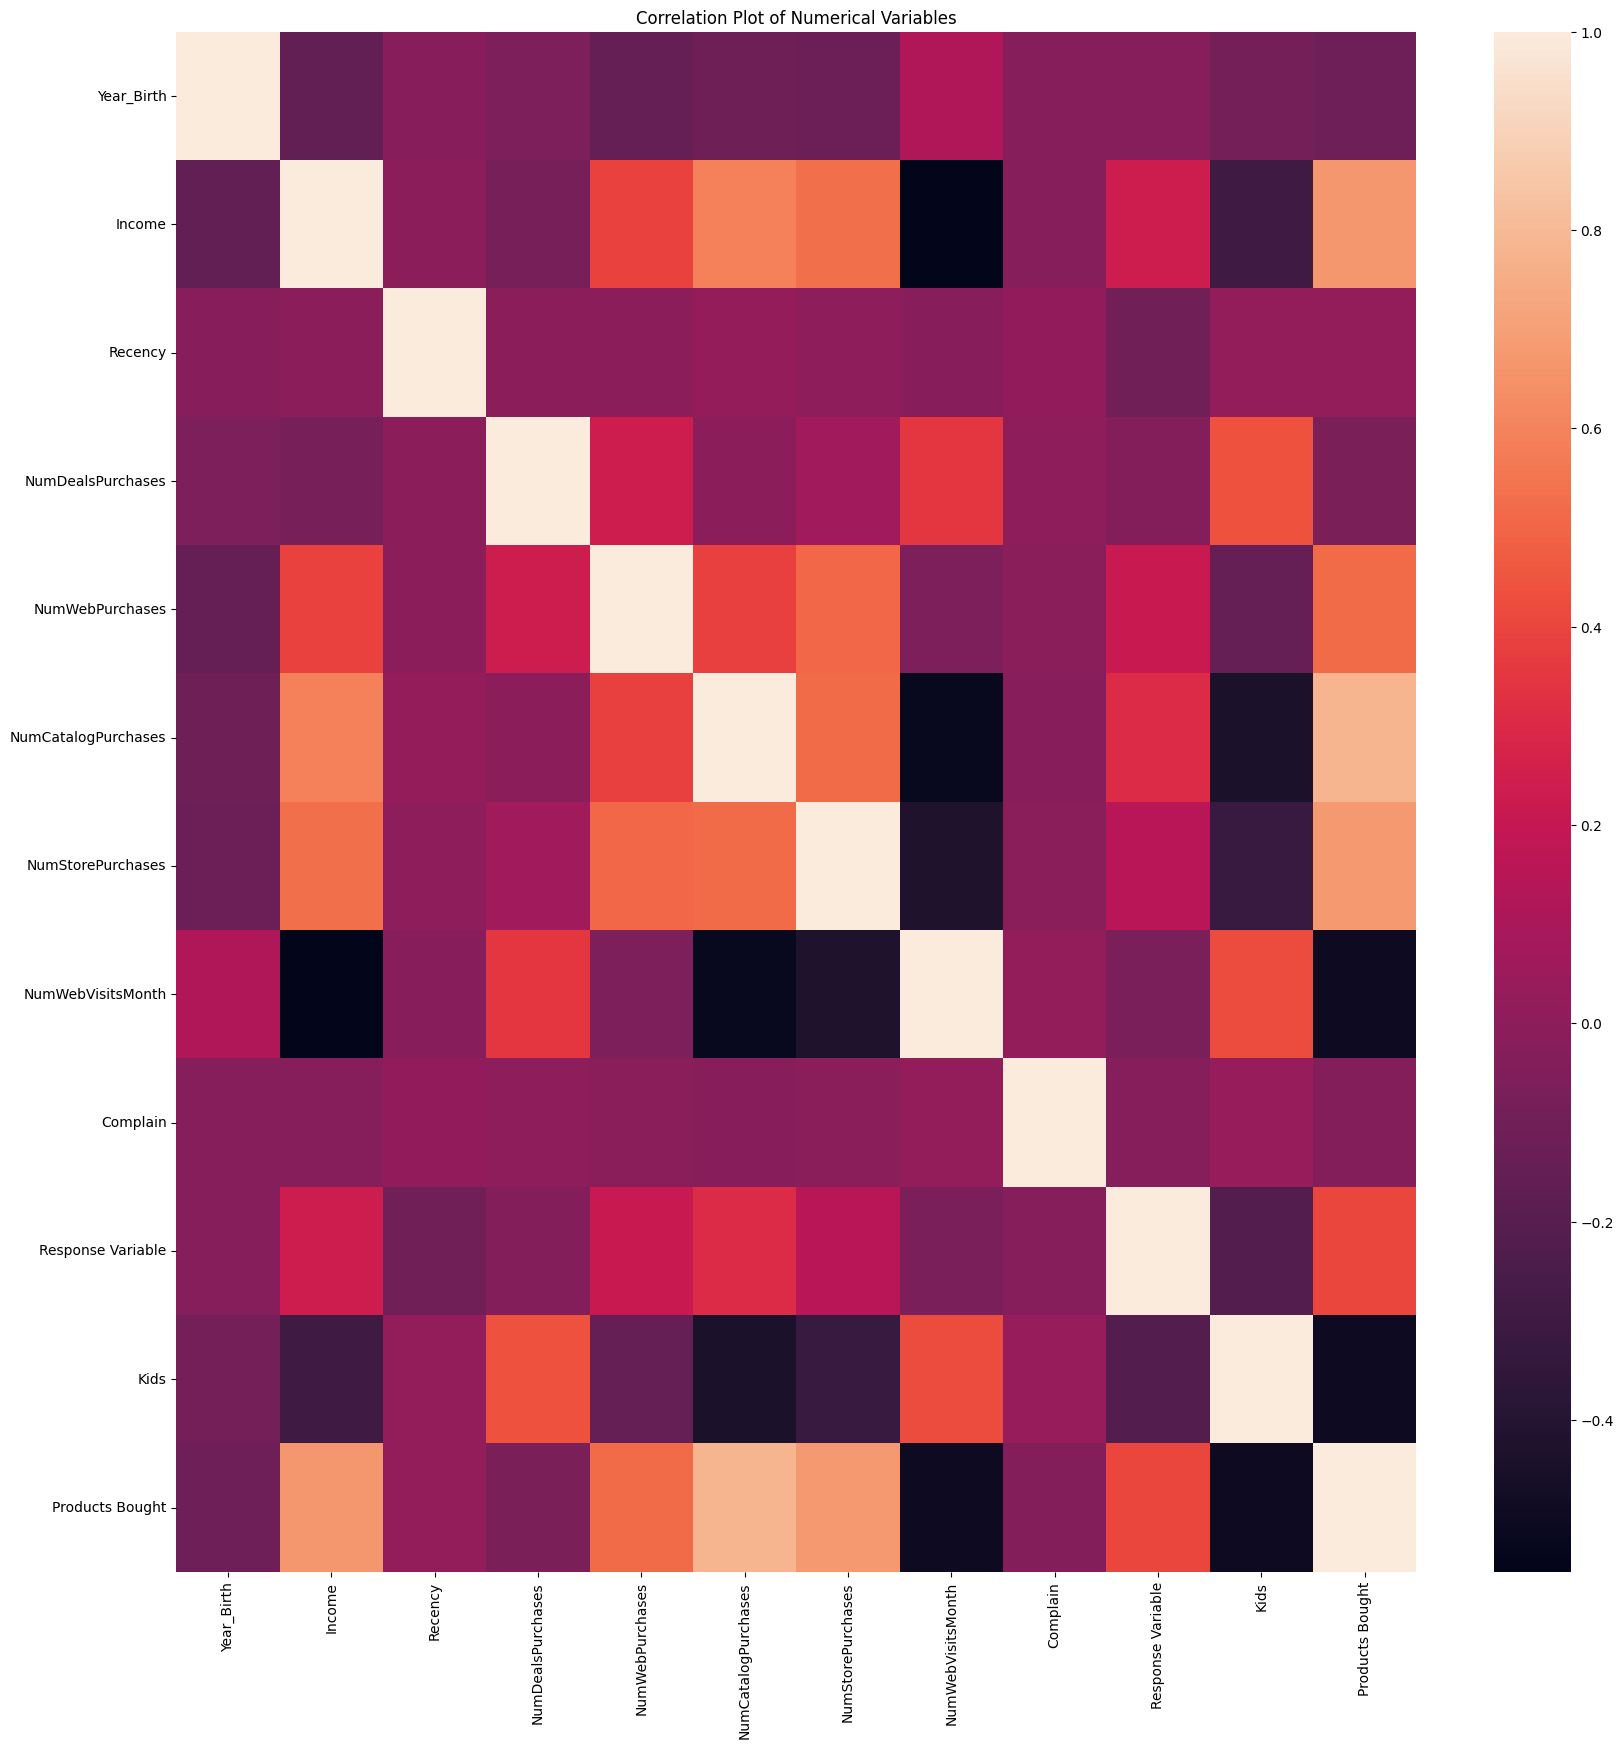

In [43]:
num_df = marketing.select_dtypes(include='number')
corr = num_df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr)
plt.title('Correlation Plot of Numerical Variables')
plt.savefig('correlationplot.png')

In [8]:
marketing.Response.value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [9]:
print(f'Missing Values: {marketing.isnull().sum()}')

Missing Values: Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [10]:
len(marketing)

2240

# Data Transformation

In [11]:
# Remove redundant columns and replace missing values
marketing.drop(columns=['Z_Revenue','Z_CostContact'],inplace=True)

In [12]:
# Categorical Data Consolidation
marital_status_consolidate = {
    'Together':'Married',
    'Divorced':'Single',
    'Widow':'Single',
    'Alone':'Single',
    'Absurd':'Single',
    'YOLO':'Single'
}
education_consolidate = {
    'PhD':'Highly Educated',
    'Master':'Highly Educated',
    '2n Cycle':'Highly Educated',
    'Graduation':'Educated',
    'Basic':'Less Educated'
}
marketing['Marital_Status'] = marketing['Marital_Status'].replace(marital_status_consolidate)
marketing['Education'] = marketing['Education'].replace(education_consolidate)
marketing['Accepted Campaign'] = marketing[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response']].sum(axis=1)
marketing['Response Variable'] = marketing['Accepted Campaign'].apply(lambda x: 1 if x>0 else 0)
marketing['Kids'] = marketing[['Kidhome','Teenhome']].sum(axis=1)
marketing['Products Bought'] = marketing[['MntWines','MntFruits','MntMeatProducts',	'MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)	
cols_to_drop = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Response', 'Kidhome','Teenhome','Accepted Campaign','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']
marketing.drop(columns = cols_to_drop, inplace=True)
marketing.head(20)

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response Variable,Kids,Products Bought
0,1957,Educated,Single,58138.0,2012-09-04,58,3,8,10,4,7,0,1,0,1617
1,1954,Educated,Single,46344.0,2014-03-08,38,2,1,1,2,5,0,0,2,27
2,1965,Educated,Married,71613.0,2013-08-21,26,1,8,2,10,4,0,0,0,776
3,1984,Educated,Married,26646.0,2014-02-10,26,2,2,0,4,6,0,0,1,53
4,1981,Highly Educated,Married,58293.0,2014-01-19,94,5,5,3,6,5,0,0,1,422
5,1967,Highly Educated,Married,62513.0,2013-09-09,16,2,6,4,10,6,0,0,1,716
6,1971,Educated,Single,55635.0,2012-11-13,34,4,7,3,7,6,0,0,1,590
7,1985,Highly Educated,Married,33454.0,2013-05-08,32,2,4,0,4,8,0,0,1,169
8,1974,Highly Educated,Married,30351.0,2013-06-06,19,1,3,0,2,9,0,1,1,46
9,1950,Highly Educated,Married,5648.0,2014-03-13,68,1,1,0,0,20,0,1,2,49


In [13]:
# Change data types for categorical data 
# object_cols = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain']
# marketing[object_cols] = marketing[object_cols].astype(object)
num_df = marketing.select_dtypes(include='number')
num_df.drop(columns='Response Variable', inplace=True)
# marketing[object_cols] = marketing[object_cols].astype(int)

In [14]:
# Normalization of data and Feature Scaling
marketing_copy = marketing.copy()

skew_table = pd.DataFrame(num_df.skew(),columns=['Skew'])
skewed_data = skew_table[((skew_table['Skew']<-0.5) | (skew_table['Skew']>0.5))]
skewed_columns = skewed_data.index.values[:-1]
print(f'Columns that will be transformed to follow a normal distribution:\n{skewed_columns}')
pt = PowerTransformer(method='yeo-johnson',standardize=True)

marketing_copy[skewed_columns] = pt.fit_transform(marketing[skewed_columns])
#pt.inverse_transform(marketing_copy[['Income']])
marketing_copy.head()
#marketing_copy[skewed_columns] = pt.inverse_transform(marketing_copy[skewed_columns])

Columns that will be transformed to follow a normal distribution:
['Income' 'NumDealsPurchases' 'NumWebPurchases' 'NumCatalogPurchases'
 'NumStorePurchases' 'Complain']


,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response Variable,Kids,Products Bought
0,1957,Educated,Single,0.365736,2012-09-04,58,0.745002,1.329470,1.726361,-0.415926,7,-0.097282,1,0,1617
1,1954,Educated,Single,-0.137976,2014-03-08,38,0.158995,-1.359729,-0.373607,-1.418287,5,-0.097282,0,2,27
2,1965,Educated,Married,0.877871,2013-08-21,26,-0.819643,1.329470,0.159579,1.244092,4,-0.097282,0,0,776
3,1984,Educated,Married,-1.166851,2014-02-10,26,0.158995,-0.708520,-1.337974,-0.415926,6,-0.097282,0,1,53
4,1981,Highly Educated,Married,0.371970,2014-01-19,94,1.443178,0.527485,0.524677,0.275211,5,-0.097282,0,1,422


In [15]:

# Outlier Removal
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    mask = (df[col] < lower_bound) | (df[col] > upper_bound)
    return mask

# outlier_mask = remove_outliers(marketing, 'Income')
# marketing_copy.loc[outlier_mask, 'Income']= np.nan


print(f'Missing Values after Outlier Removal: \n{marketing_copy.isnull().sum()}')
#marketing.dropna(how='any',inplace=True)
#marketing['Income'].fillna(
# print(f'Missing Values Check: \n{marketing.isnull().sum()}')
income_avg = marketing_copy['Income'].mean(skipna=True)
marketing_copy['Income'] = marketing_copy['Income'].fillna(value=income_avg)

Missing Values after Outlier Removal: 
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Dt_Customer             0
Recency                 0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response Variable       0
Kids                    0
Products Bought         0
dtype: int64


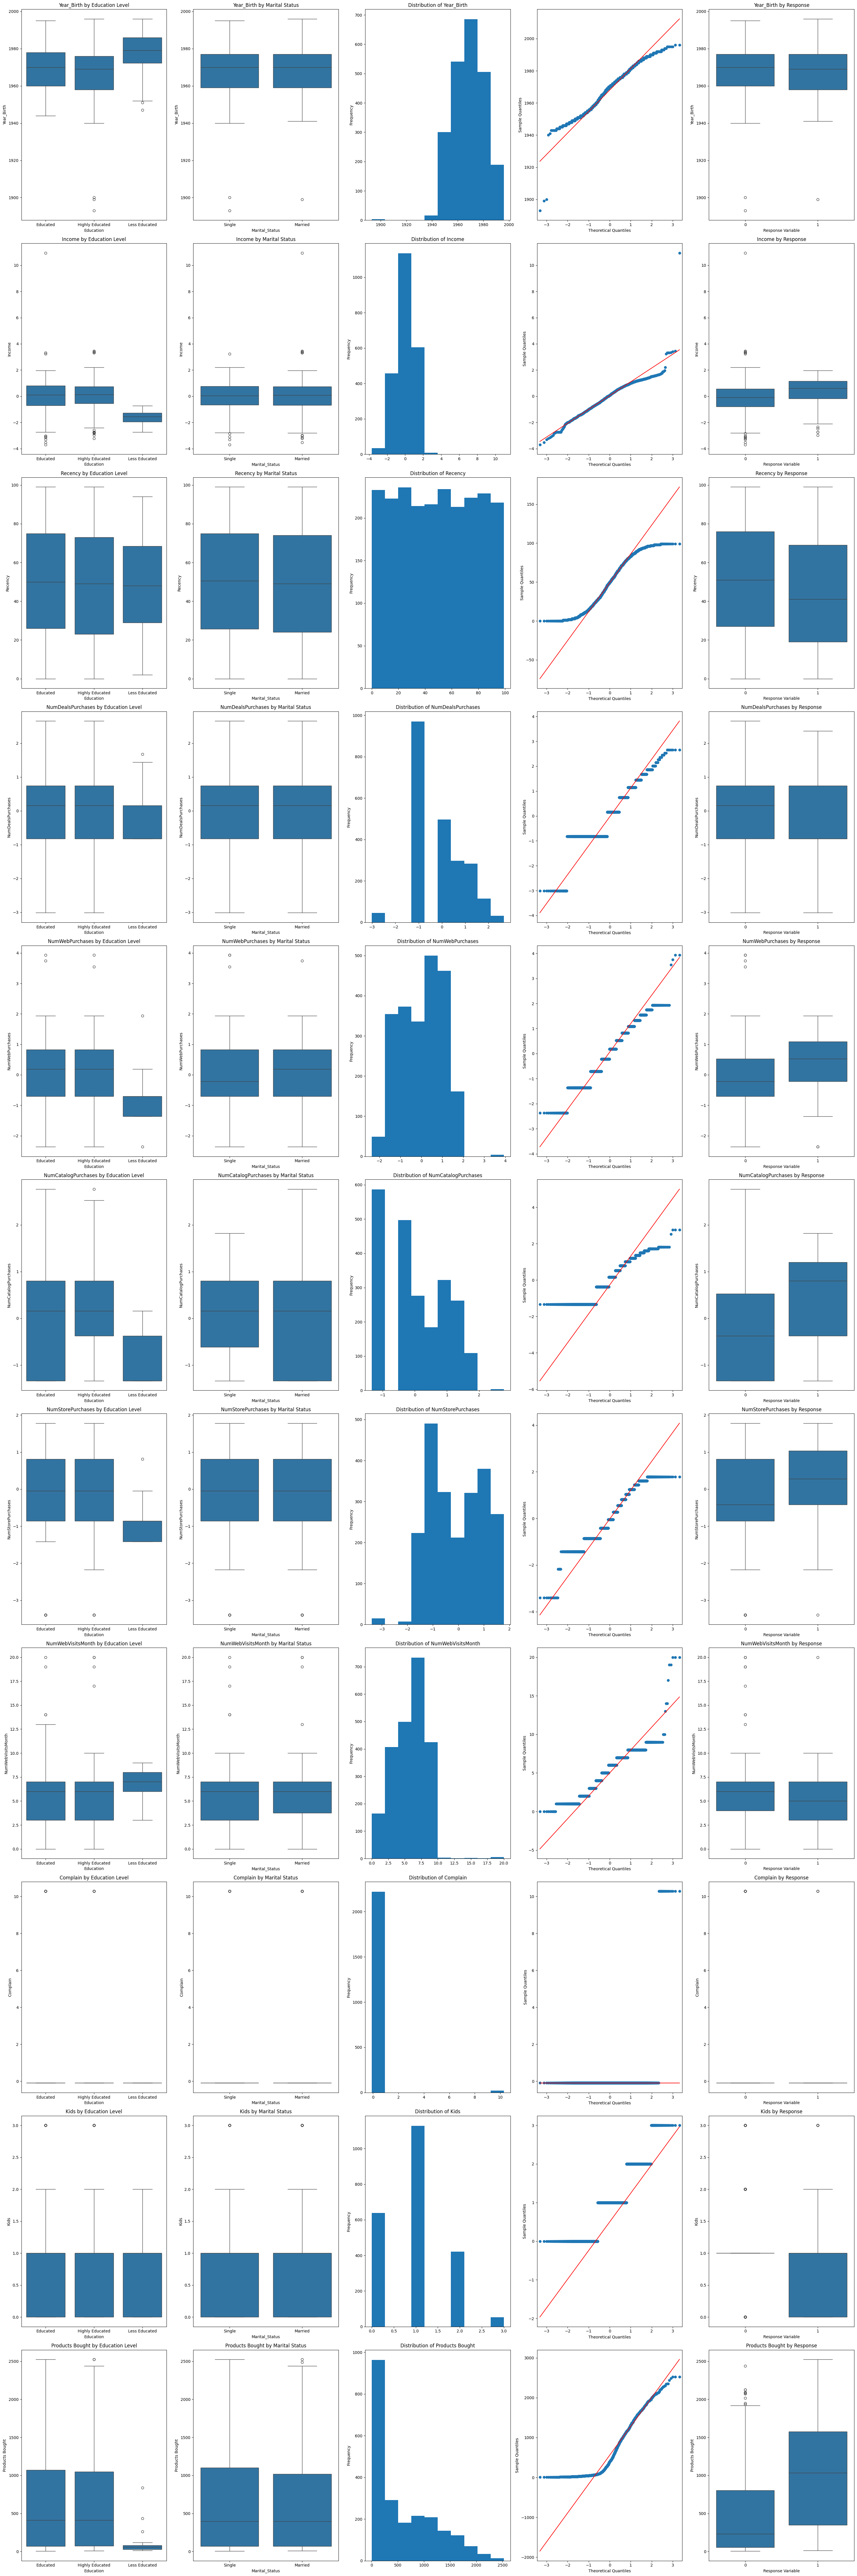

In [16]:
diagnostic_plots(marketing_copy,'Response Variable')

In [18]:
marketing_copy['Dt_Customer'] = pd.to_datetime(marketing_copy['Dt_Customer'],format='%Y-%m-%d')

marketing_copy['Dt_Customer_Year'] = marketing_copy['Dt_Customer'].dt.year
marketing_copy['Dt_Customer_Month'] = marketing_copy['Dt_Customer'].dt.month
# Cyclical encoding for month
# marketing_copy['month_sin'] = np.sin(2 * np.pi * marketing_copy['Dt_Customer_Month'] / 12)
# marketing_copy['month_cos'] = np.cos(2 * np.pi * marketing_copy['Dt_Customer_Month'] / 12)

# Drop original year and month columns

marketing_copy.drop(columns=['Dt_Customer'],axis=1,inplace=True)
# marketing_copy['Age'] = 2024 - marketing_copy['Year_Birth']
# marketing_copy.drop(columns='Year_Birth',inplace=True)

In [19]:
# One Hot Encoding
cat_cols = ['Dt_Customer_Year','Education','Marital_Status']
print(f'Categorical Columns are:\n{cat_cols}')
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
ohe_transformed = ohe.fit_transform(marketing_copy[cat_cols])
df = pd.concat([ohe_transformed, marketing_copy],axis=1).drop(columns=cat_cols,axis=1)

df.head()

Categorical Columns are:
['Dt_Customer_Year', 'Education', 'Marital_Status']


,Dt_Customer_Year_2012,Dt_Customer_Year_2013,Dt_Customer_Year_2014,Education_Educated,Education_Highly Educated,Education_Less Educated,Marital_Status_Married,Marital_Status_Single,Year_Birth,Income,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response Variable,Kids,Products Bought,Dt_Customer_Month
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1957,0.365736,...,0.745002,1.329470,1.726361,-0.415926,7,-0.097282,1,0,1617,9
1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1954,-0.137976,...,0.158995,-1.359729,-0.373607,-1.418287,5,-0.097282,0,2,27,3
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1965,0.877871,...,-0.819643,1.329470,0.159579,1.244092,4,-0.097282,0,0,776,8
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1984,-1.166851,...,0.158995,-0.708520,-1.337974,-0.415926,6,-0.097282,0,1,53,2
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1981,0.371970,...,1.443178,0.527485,0.524677,0.275211,5,-0.097282,0,1,422,1


# Machine Learning Models
## Logistic Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import statsmodels.api as sm

In [21]:
marketing_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Recency              2240 non-null   int64  
 5   NumDealsPurchases    2240 non-null   float64
 6   NumWebPurchases      2240 non-null   float64
 7   NumCatalogPurchases  2240 non-null   float64
 8   NumStorePurchases    2240 non-null   float64
 9   NumWebVisitsMonth    2240 non-null   int64  
 10  Complain             2240 non-null   float64
 11  Response Variable    2240 non-null   int64  
 12  Kids                 2240 non-null   int64  
 13  Products Bought      2240 non-null   int64  
 14  Dt_Customer_Year     2240 non-null   int32  
 15  Dt_Customer_Month    2240 non-null   i

1792 data points used for training model
448 data points used for testing model
Accuracy: 0.7589285714285714
              precision    recall  f1-score   support

           0       0.89      0.75      0.82       319
           1       0.56      0.78      0.65       129

    accuracy                           0.76       448
   macro avg       0.73      0.76      0.73       448
weighted avg       0.80      0.76      0.77       448



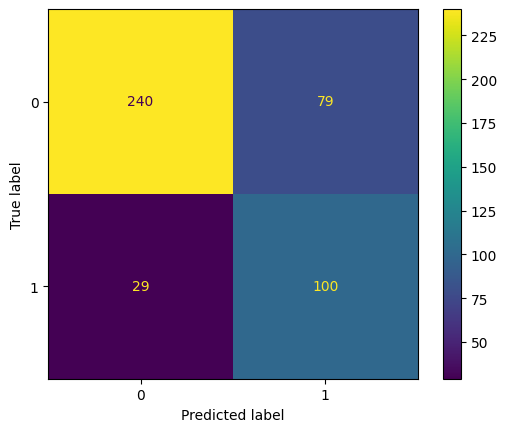

In [104]:
X = df.drop(columns='Response Variable',axis=1)
y = df['Response Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'{len(X_train)} data points used for training model')
print(f'{len(X_test)} data points used for testing model')
model = LogisticRegression(solver='liblinear',random_state=0,max_iter=100)
# X_train = sm.add_constant(X_train)
# X_test = sm.add_constant(X_test)

model = LogisticRegression(solver='liblinear',random_state=0)
model.fit(X_train,y_train)

# make predictions
y_probs = model.predict_proba(X_test)[:,1]
y_pred = (y_probs>0.25).astype(int)
# y_pred = model.predict(X_test)
# Evaluate performance 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:',accuracy)

cm =confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
print(classification_report(y_test,y_pred))
plt.savefig('confusion_matrix.png')

In [87]:
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,

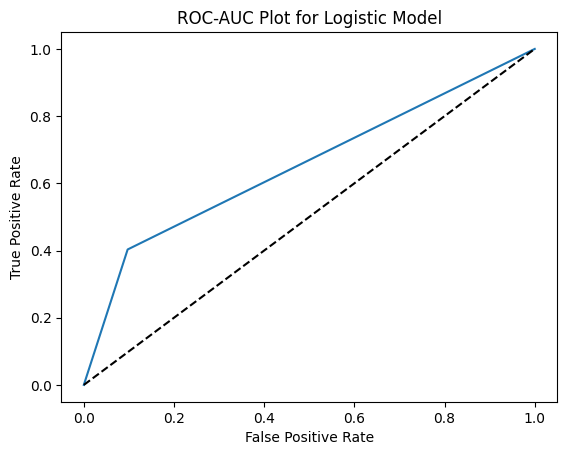

In [88]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label = f'AUC Score: {round(roc_auc,2)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Plot for Logistic Model')
plt.plot([0,1],[0,1],'--k')
plt.savefig('ROC_AUC.png')
plt.show()


In [92]:
for i in range(len(fpr)):
    print(fpr[i], tpr[i], thresholds[i])

0.0 0.0 inf
0.09717868338557993 0.40310077519379844 1.0
1.0 1.0 0.0


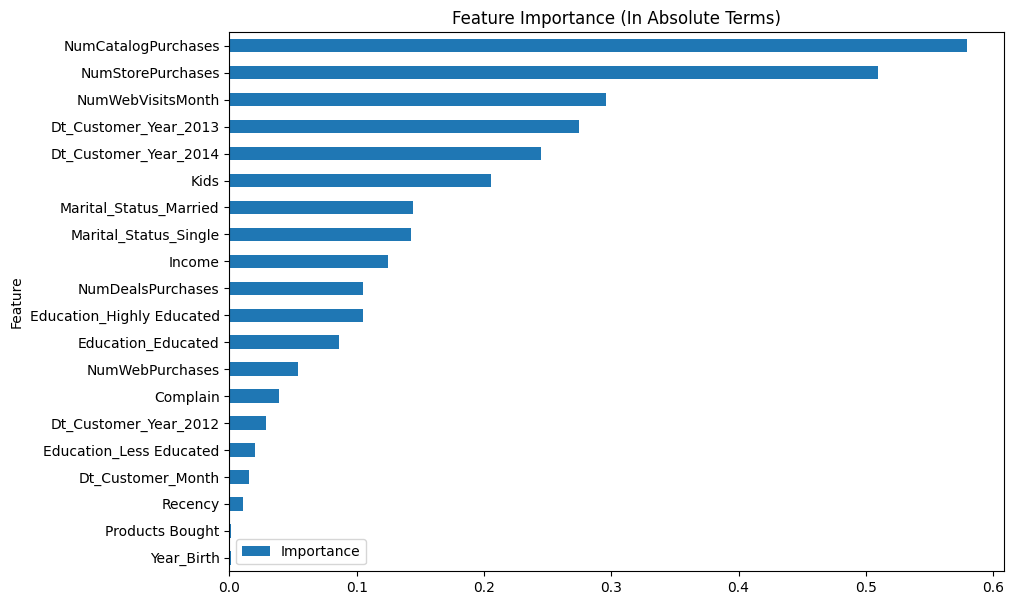

In [109]:
coefficients = model.coef_
avg_importance = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature':X.columns, 'Importance':avg_importance})
feature_importance = feature_importance.sort_values('Importance',ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10,7))
plt.title('Feature Importance (In Absolute Terms)')
plt.savefig('FeatureImportanceAbs.png')

Optimization terminated successfully.
         Current function value: 0.460326
         Iterations 13


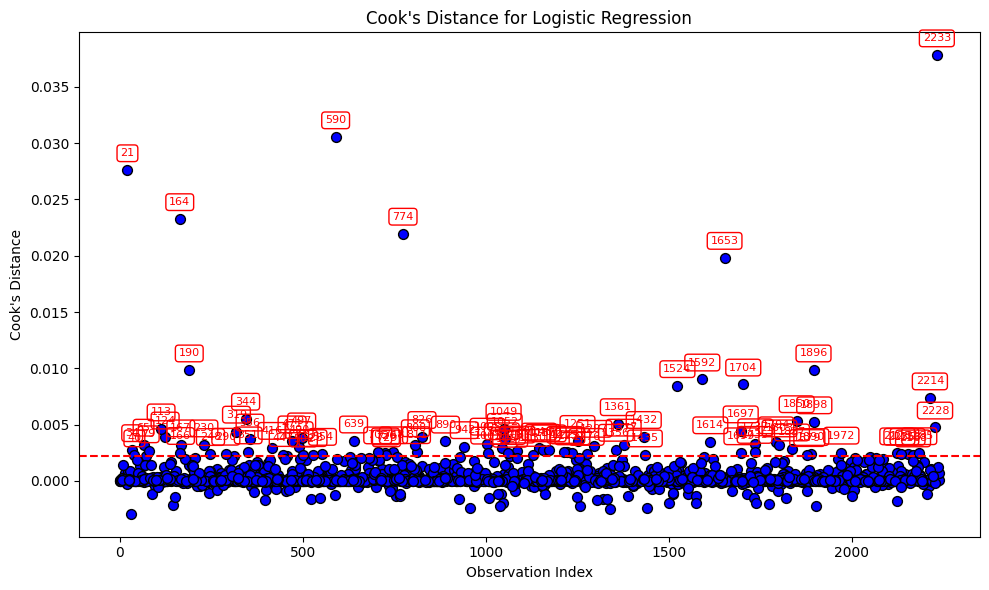

In [25]:
model = sm.Logit(y_train, X_train).fit()
# Get the influence measures
influence = model.get_influence()

# Cook's distance
cooks_d = influence.cooks_distance[0]
influential_points = np.where(cooks_d > 4 / len(X_train))[0]
threshold = 4 / len(X_train)
# Plot Cook's distance

plt.figure(figsize=(10, 6))
plt.scatter(X_train.index, cooks_d, color='blue',s=50,edgecolor='k',label='Data points')
for i in influential_points:
    plt.annotate(X_train.index[i], 
                 (X_train.index[i], cooks_d[i]), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center', 
                 color='red', 
                 fontsize=8, 
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="red", facecolor="none"))
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold (4/n = {threshold:.2f})')

plt.title("Cook's Distance for Logistic Regression")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")

plt.tight_layout()
plt.show()

# Identify influential points


In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# model = sm.Logit(y_test, X_test).fit()
# # Get the influence measures
# influence = model.get_influence()

# # Cook's distance
# cooks_d = influence.cooks_distance[0]
# influential_points = np.where(cooks_d > 4 / len(X))[0]

# test_results = X_test.copy()
# test_results['target'] = y_test.values
# test_results['cooks_d'] = cooks_d
# test_results['influential'] = test_results.index.isin(influential_points)
# test_results.sort_index(inplace=True)
# print(test_results[test_results['influential']==True])

# # X_test = X_test.iloc[influential_points[influential_points>200]]
# # y_test = y_test.iloc[influential_points[influential_points>200]]

# SVM Model

SVM Accuracy: 0.7678571428571429
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       319
           1       0.64      0.44      0.52       129

    accuracy                           0.77       448
   macro avg       0.72      0.67      0.68       448
weighted avg       0.75      0.77      0.75       448



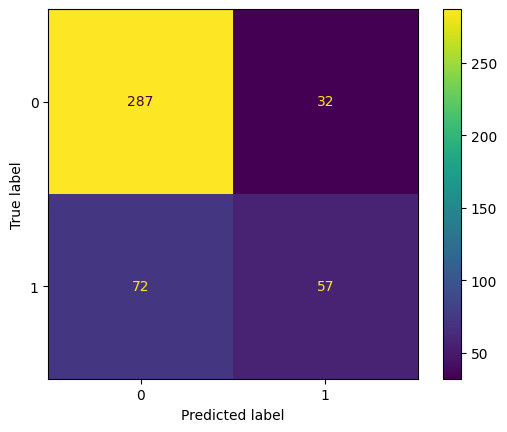

In [120]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('SVM Accuracy:',accuracy)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



In [115]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('clf',SVC(kernel='rbf',gamma=0.01, C=100))
               ])
print(X_train.shape)
parameters = {
    'clf__gamma':(0.01, 0.03, 0.1, 0.3,1),
    'clf__C':(0.1,0.3,1,3,10,30)
}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=10, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)
print('Best Score:%0.3f'% grid_search.best_score_)
print('Best Parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(param_name, best_parameters[param_name])
predictions = grid_search.predict(X_test)
print('Accuracy:',accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

(1792, 20)
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Score:0.751
Best Parameters set:
clf__C 1
clf__gamma 0.1
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       319
           1       0.95      0.14      0.24       129

    accuracy                           0.75       448
   macro avg       0.84      0.57      0.55       448
weighted avg       0.80      0.75      0.68       448

